<center><h1>Ye_Jinyi_HW8</h1></center>

Name: Jinyi Ye
<br>
Github Username: angelayejinyi
<br>
USC ID: 1552624974
<br>
Late Days: 3

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set

In [2]:
# set column names according to wdbc.name
column_names = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
                'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
                'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
                'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst',
                'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
                'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

df = pd.read_csv('../data/wdbc.data', header=None, names=column_names, sep=',')

# replace 'M-malicious' with 1 and 'B-benign' with 0
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### (b) Monte-Carlo Simulation

In [2]:
# define the train-test split function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def split_dataset(df, normalize=False):
    X = df.drop(['id', 'diagnosis'], axis=1)
    y = df['diagnosis']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    if normalize:
        scaler = StandardScaler()
        X_train_normalized = scaler.fit_transform(X_train)
        X_test_normalized = scaler.transform(X_test)
        return X_train_normalized, X_test_normalized, y_train, y_test
    else:
        return X_train, X_test, y_train, y_test

#### (i) Supervised Learning

In [8]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.calibration import CalibratedClassifierCV

In [262]:
train_acc = []
train_prec = []
train_rec = []
train_f1 = []
train_auc = []

test_acc = []
test_prec = []
test_rec = []
test_f1 = []
test_auc = []

# L1-penalized SVM, Monte-Carlo Simulation M=30
for i in range(30):
    X_train, X_test, y_train, y_test = split_dataset(df, normalize=True)

    model = LinearSVC(penalty='l1', dual=False, max_iter=100000)
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    print('Attempt:', i+1)
    print(f"Best penalty parameter: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_}")

    best_model = LinearSVC(penalty='l1', dual=False, C=grid_search.best_params_['C'], max_iter=100000)
    best_model.fit(X_train, y_train)
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    # Apply Platt scaling to obtain class probabilities
    best_model_probs = CalibratedClassifierCV(best_model, method='sigmoid')
    best_model_probs.fit(X_train, y_train)
    y_train_prob = best_model_probs.predict_proba(X_train)[:, 1]
    y_test_prob = best_model_probs.predict_proba(X_test)[:, 1]

    # Compute evaluation metrics for training set
    train_acc.append(metrics.accuracy_score(y_train, y_train_pred))
    train_prec.append(metrics.precision_score(y_train, y_train_pred))
    train_rec.append(metrics.recall_score(y_train, y_train_pred))
    train_f1.append(metrics.f1_score(y_train, y_train_pred))
    train_auc.append(metrics.roc_auc_score(y_train, y_train_pred))

    # Compute evaluation metrics for test set
    test_acc.append(metrics.accuracy_score(y_test, y_test_pred))
    test_prec.append(metrics.precision_score(y_test, y_test_pred))
    test_rec.append(metrics.recall_score(y_test, y_test_pred))
    test_f1.append(metrics.f1_score(y_test, y_test_pred))
    test_auc.append(metrics.roc_auc_score(y_test, y_test_pred))

Attempt: 1
Best penalty parameter: {'C': 1}
Best cross-validation score: 0.9758241758241759
Attempt: 2
Best penalty parameter: {'C': 1}
Best cross-validation score: 0.9802197802197803
Attempt: 3
Best penalty parameter: {'C': 0.1}
Best cross-validation score: 0.9780219780219781
Attempt: 4
Best penalty parameter: {'C': 0.1}
Best cross-validation score: 0.9736263736263737
Attempt: 5
Best penalty parameter: {'C': 0.1}
Best cross-validation score: 0.9758241758241759
Attempt: 6
Best penalty parameter: {'C': 0.1}
Best cross-validation score: 0.9736263736263737
Attempt: 7
Best penalty parameter: {'C': 0.1}
Best cross-validation score: 0.9736263736263735
Attempt: 8
Best penalty parameter: {'C': 0.1}
Best cross-validation score: 0.9824175824175825
Attempt: 9
Best penalty parameter: {'C': 1}
Best cross-validation score: 0.9692307692307691
Attempt: 10
Best penalty parameter: {'C': 1}
Best cross-validation score: 0.9692307692307693
Attempt: 11
Best penalty parameter: {'C': 0.1}
Best cross-validatio

In [263]:
# Print average evaluation metrics for both sets
print("Training set average evaluation metrics:")
print("Accuracy: {:.5f}".format(np.mean(train_acc)))
print("Precision: {:.5f}".format(np.mean(train_prec)))
print("Recall: {:.5f}".format(np.mean(train_rec)))
print("F1-score: {:.5f}".format(np.mean(train_f1)))
print("AUC: {:.5f}".format(np.mean(train_auc)))

print("\nTest set average evaluation metrics:")
print("Accuracy: {:.5f}".format(np.mean(test_acc)))
print("Precision: {:.5f}".format(np.mean(test_prec)))
print("Recall: {:.5f}".format(np.mean(test_rec)))
print("F1-score: {:.5f}".format(np.mean(test_f1)))
print("AUC: {:.5f}".format(np.mean(test_auc)))

Training set average evaluation metrics:
Accuracy: 0.98711
Precision: 0.99202
Recall: 0.97333
F1-score: 0.98256
AUC: 0.98433

Test set average evaluation metrics:
Accuracy: 0.97164
Precision: 0.97608
Recall: 0.94683
F1-score: 0.96071
AUC: 0.96647


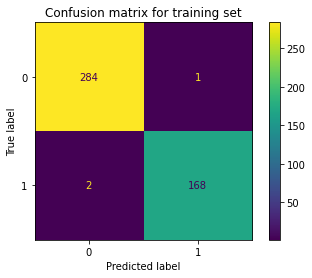

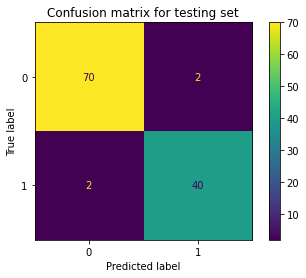

In [264]:
# Report the confusion matrix for training and testing in one of the runs
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_train, y_train_pred)
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cm_display.plot(ax=ax)
ax.set_title('Confusion matrix for training set')
plt.show()

fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cm_display.plot(ax=ax)
ax.set_title('Confusion matrix for testing set')
plt.show()

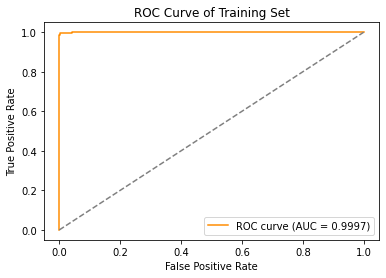

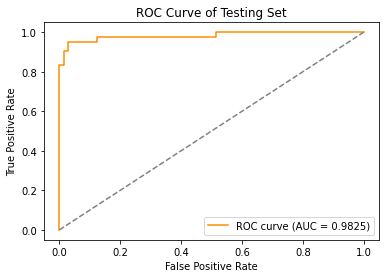

In [265]:
# Plot the ROC curve for training and testing in one of the runs
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Training Set')
plt.legend(loc="lower right")
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Testing Set')
plt.legend(loc="lower right")
plt.show()

#### (ii) Semi-Supervised Learning/ Self-training

##### (A) & (B)

In [258]:
train_acc = []
train_prec = []
train_rec = []
train_f1 = []
train_auc = []

test_acc = []
test_prec = []
test_rec = []
test_f1 = []
test_auc = []

for i in range(30):
    X_train, X_test, y_train, y_test = split_dataset(df, normalize=True)

    # select 50% of the positive class along with 50% of the negative class in the training set
    # as labeled data and the rest as unlabelled data
    X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(X_train, y_train, test_size=0.5, stratify=y_train)

    # Train an L1-penalized SVM to classify the labeled data
    model = LinearSVC(penalty='l1', dual=False, max_iter=100000)
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
    grid_search.fit(X_labeled, y_labeled)

    print('Attempt:', i+1)
    print(f"Best penalty parameter: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_}")

    best_model = LinearSVC(penalty='l1', dual=False, C=grid_search.best_params_['C'], max_iter=100000)
    best_model.fit(X_labeled, y_labeled)
    
    # find the farthest unlabeled data point and add to model
    while len(X_unlabeled) > 0:
        # get the signed distance of each unlabeled point to the decision boundary
        distances = best_model.decision_function(X_unlabeled)

        # get index of unlabeled point with highest absolute distance
        farthest_index = np.argmax(np.abs(distances)) 
        farthest_point = X_unlabeled[farthest_index]

        X_labeled = np.vstack([X_labeled, farthest_point.reshape(1, -1)])
        y_labeled = np.append(y_labeled, best_model.predict(farthest_point.reshape(1, -1)))

        # remove the farthest unlabeled point from the unlabeled data
        X_unlabeled = np.delete(X_unlabeled, farthest_index, axis=0)
        
        # fit the model with new data
        best_model.fit(X_labeled, y_labeled)
    
    # get final predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    # Apply Platt scaling to obtain class probabilities
    best_model_probs = CalibratedClassifierCV(best_model, method='sigmoid')
    best_model_probs.fit(X_train, y_train)
    y_train_prob = best_model_probs.predict_proba(X_train)[:, 1]
    y_test_prob = best_model_probs.predict_proba(X_test)[:, 1]

    # Compute evaluation metrics for training set
    train_acc.append(metrics.accuracy_score(y_train, y_train_pred))
    train_prec.append(metrics.precision_score(y_train, y_train_pred))
    train_rec.append(metrics.recall_score(y_train, y_train_pred))
    train_f1.append(metrics.f1_score(y_train, y_train_pred))
    train_auc.append(metrics.roc_auc_score(y_train, y_train_pred))

    # Compute evaluation metrics for test set
    test_acc.append(metrics.accuracy_score(y_test, y_test_pred))
    test_prec.append(metrics.precision_score(y_test, y_test_pred))
    test_rec.append(metrics.recall_score(y_test, y_test_pred))
    test_f1.append(metrics.f1_score(y_test, y_test_pred))
    test_auc.append(metrics.roc_auc_score(y_test, y_test_pred))

Attempt: 1
Best penalty parameter: {'C': 0.1}
Best cross-validation score: 0.9645410628019324
Attempt: 2
Best penalty parameter: {'C': 0.1}
Best cross-validation score: 0.9736231884057972
Attempt: 3
Best penalty parameter: {'C': 0.1}
Best cross-validation score: 0.982512077294686
Attempt: 4
Best penalty parameter: {'C': 1}
Best cross-validation score: 0.9778743961352656
Attempt: 5
Best penalty parameter: {'C': 10}
Best cross-validation score: 0.9735265700483092
Attempt: 6
Best penalty parameter: {'C': 0.1}
Best cross-validation score: 0.9778743961352656
Attempt: 7
Best penalty parameter: {'C': 0.1}
Best cross-validation score: 0.9603864734299516
Attempt: 8
Best penalty parameter: {'C': 0.1}
Best cross-validation score: 0.9559420289855073
Attempt: 9
Best penalty parameter: {'C': 0.1}
Best cross-validation score: 0.9559420289855073
Attempt: 10
Best penalty parameter: {'C': 0.1}
Best cross-validation score: 0.9649275362318841
Attempt: 11
Best penalty parameter: {'C': 1}
Best cross-validat

In [259]:
# Print average evaluation metrics for both sets
print("Training set average evaluation metrics:")
print("Accuracy: {:.5f}".format(np.mean(train_acc)))
print("Precision: {:.5f}".format(np.mean(train_prec)))
print("Recall: {:.5f}".format(np.mean(train_rec)))
print("F1-score: {:.5f}".format(np.mean(train_f1)))
print("AUC: {:.5f}".format(np.mean(train_auc)))

print("\nTest set average evaluation metrics:")
print("Accuracy: {:.5f}".format(np.mean(test_acc)))
print("Precision: {:.5f}".format(np.mean(test_prec)))
print("Recall: {:.5f}".format(np.mean(test_rec)))
print("F1-score: {:.5f}".format(np.mean(test_f1)))
print("AUC: {:.5f}".format(np.mean(test_auc)))

Training set average evaluation metrics:
Accuracy: 0.97451
Precision: 0.98240
Recall: 0.94902
F1-score: 0.96523
AUC: 0.96936

Test set average evaluation metrics:
Accuracy: 0.96608
Precision: 0.96987
Recall: 0.93810
F1-score: 0.95313
AUC: 0.96025


In this case, semi-supervised learning performs nearly as well as supervised learning, although it tends to propagate the errors of the initial labeling and the model may become overconfident on incorrect predictions. Semi-supervised learning can be beneficial when there is a limited amount of labeled data and a large amount of unlabeled data.

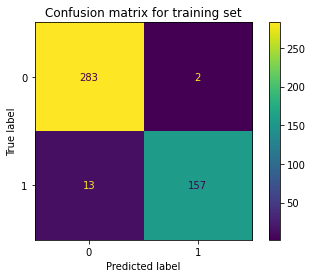

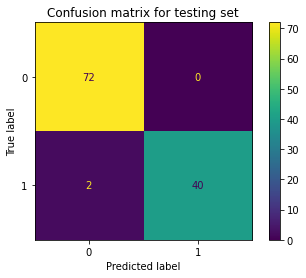

In [260]:
# Report the confusion matrix for training and testing in one of the runs
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_train, y_train_pred)
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cm_display.plot(ax=ax)
ax.set_title('Confusion matrix for training set')
plt.show()

fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cm_display.plot(ax=ax)
ax.set_title('Confusion matrix for testing set')
plt.show()

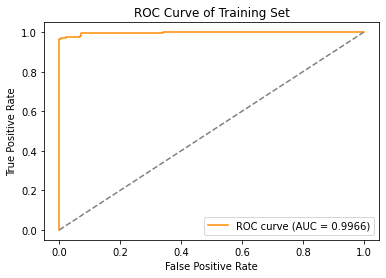

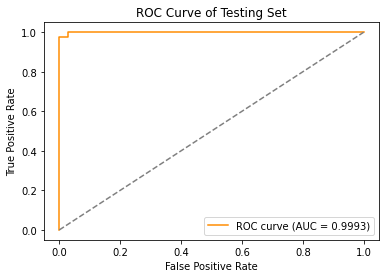

In [261]:
# Plot the ROC curve for training and testing in one of the runs
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Training Set')
plt.legend(loc="lower right")
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Testing Set')
plt.legend(loc="lower right")
plt.show()

#### (iii) Unsupervised Learning

##### (A): Run the k-means algorithm multiple times and initialize randomly. How do you make sure that the algorithm was not trapped in a local minimum?

To avoid the algorithm trapping in local minima, we can use multiple initializations and choose initial centroids randomly.

In [6]:
from sklearn.cluster import KMeans

# run k-means 30 times
silhouette_scores = []
for i in range(30):
    X_train, X_test, y_train, y_test = split_dataset(df, normalize=False)
    
    # Initialize the k-means model randomly, with multiple iterations
    kmeans = KMeans(n_clusters=2, n_init = 15, init='random')
    kmeans.fit(X_train)
    score = metrics.silhouette_score(X_train, kmeans.labels_)
    silhouette_scores.append(score)

We can use silhouette analysis to evaluate the quality of the clustering results. Silhouette analysis measures how similar a data point is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, with a higher score indicating a better clustering. We can compute the silhouette score for each run and select the run with the highest average silhouette score.

Average Silhouette score for best run: 0.7097474604831886


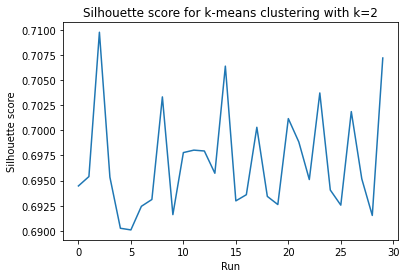

In [7]:
# Find the run with the highest average Silhouette score
best_run = np.argmax(silhouette_scores)
print("Average Silhouette score for best run:", silhouette_scores[best_run])

# Plot the Silhouette score for all runs
plt.plot(range(30), silhouette_scores)
plt.xlabel("Run")
plt.ylabel("Silhouette score")
plt.title("Silhouette score for k-means clustering with k=2")
plt.show()

We can also use visual inspection of the clusters, if the clusters are clearly separated and distinct, it may suggest that the algorithm has found a good minimum.

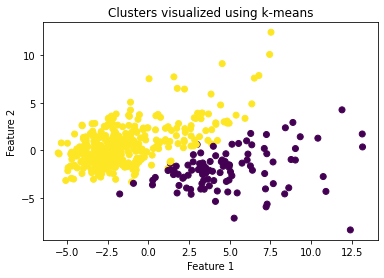

In [8]:
from sklearn.decomposition import PCA

# reduce feature dimension to 2
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# get the labels
labels = kmeans.labels_

# Plot the clusters on two pca features
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Clusters visualized using k-means")
plt.show()

Overall, from the Silhouette analysis (scores all over 0.5) and visualization (clearly separated clusters) we can conclude that K-means algorithm performs quite well on training data.

##### (B) & (C): Using k-means as a classifier, find the closest 30 data points and perform majority polling, predict train and test set

In [29]:
train_acc = []
train_prec = []
train_rec = []
train_f1 = []
train_auc = []

test_acc = []
test_prec = []
test_rec = []
test_f1 = []
test_auc = []

for i in range(30):
    print('Attempt:', i+1)
    
    X_train, X_test, y_train, y_test = split_dataset(df, normalize=False)

    # Initialize the k-means model randomly, set number of iterations to avoid local minima
    kmeans = KMeans(n_clusters=2, n_init=15, init='random')
    kmeans.fit(X_train)

    # Get the cluster centers
    centers = kmeans.cluster_centers_

    # Compute distances to cluster center and keep original indices
    distances_0 = np.column_stack((X_train.index, np.linalg.norm(X_train - centers[0], axis=1)))
    distances_1 = np.column_stack((X_train.index, np.linalg.norm(X_train - centers[1], axis=1)))

    # Sort distances by ascending order
    sorted_distances_0 = distances_0[distances_0[:, 1].argsort()]
    sorted_distances_1 = distances_1[distances_1[:, 1].argsort()]

    # Get indices of the closest 30 data points to the center
    closest_indices_0 = sorted_distances_0[:30, 0].astype(int)
    closest_indices_1 = sorted_distances_1[:30, 0].astype(int)

    # Get the true labels of those 30 points from y_train
    labels_0 = y_train[closest_indices_0]
    labels_1 = y_train[closest_indices_1]

    # Take a majority poll within each cluster
    pred_label_0 = np.bincount(labels_0).argmax()
    pred_label_1 = np.bincount(labels_1).argmax()

    # Assign predicted label to all data points in first cluster
    y_train_pred = np.zeros(len(X_train))
    y_train_pred[kmeans.labels_ == 0] = pred_label_0
    y_train_pred[kmeans.labels_ == 1] = pred_label_1

    # Compute distances between test data and cluster centers
    distances_test = np.column_stack((np.arange(len(X_test)),
                                      np.linalg.norm(X_test - centers[0], axis=1),
                                      np.linalg.norm(X_test - centers[1], axis=1)))

    # Assign test data to cluster with closest center
    test_cluster_assignments = np.argmin(distances_test[:, 1:], axis=1)

    # Use predicted labels to classify test data
    y_test_pred = np.zeros(len(X_test))
    for i in range(len(X_test)):
        if test_cluster_assignments[i] == 0:
            y_test_pred[i] = pred_label_0
        else:
            y_test_pred[i] = pred_label_1

    # Compute evaluation metrics for training set
    train_acc.append(metrics.accuracy_score(y_train, y_train_pred))
    train_prec.append(metrics.precision_score(y_train, y_train_pred))
    train_rec.append(metrics.recall_score(y_train, y_train_pred))
    train_f1.append(metrics.f1_score(y_train, y_train_pred))
    train_auc.append(metrics.roc_auc_score(y_train, y_train_pred))

    # Compute evaluation metrics for test set
    test_acc.append(metrics.accuracy_score(y_test, y_test_pred))
    test_prec.append(metrics.precision_score(y_test, y_test_pred))
    test_rec.append(metrics.recall_score(y_test, y_test_pred))
    test_f1.append(metrics.f1_score(y_test, y_test_pred))
    test_auc.append(metrics.roc_auc_score(y_test, y_test_pred))
    
    print("Train accuracy:", metrics.accuracy_score(y_train, y_train_pred), 
          "Test accuracy:", metrics.accuracy_score(y_test, y_test_pred))

Attempt: 1
Train accuracy: 0.8505494505494505 Test accuracy: 0.8508771929824561
Attempt: 2
Train accuracy: 0.8527472527472527 Test accuracy: 0.8508771929824561
Attempt: 3
Train accuracy: 0.8505494505494505 Test accuracy: 0.8596491228070176
Attempt: 4
Train accuracy: 0.8527472527472527 Test accuracy: 0.8508771929824561
Attempt: 5
Train accuracy: 0.8505494505494505 Test accuracy: 0.8508771929824561
Attempt: 6
Train accuracy: 0.8483516483516483 Test accuracy: 0.8771929824561403
Attempt: 7
Train accuracy: 0.8373626373626374 Test accuracy: 0.8508771929824561
Attempt: 8
Train accuracy: 0.8373626373626374 Test accuracy: 0.868421052631579
Attempt: 9
Train accuracy: 0.8483516483516483 Test accuracy: 0.8596491228070176
Attempt: 10
Train accuracy: 0.8527472527472527 Test accuracy: 0.8596491228070176
Attempt: 11
Train accuracy: 0.8505494505494505 Test accuracy: 0.868421052631579
Attempt: 12
Train accuracy: 0.8571428571428571 Test accuracy: 0.8421052631578947
Attempt: 13
Train accuracy: 0.861538461

In [30]:
# Print average evaluation metrics for both sets
print("Training set average evaluation metrics:")
print("Accuracy: {:.5f}".format(np.mean(train_acc)))
print("Precision: {:.5f}".format(np.mean(train_prec)))
print("Recall: {:.5f}".format(np.mean(train_rec)))
print("F1-score: {:.5f}".format(np.mean(train_f1)))
print("AUC: {:.5f}".format(np.mean(train_auc)))

print("\nTest set average evaluation metrics:")
print("Accuracy: {:.5f}".format(np.mean(test_acc)))
print("Precision: {:.5f}".format(np.mean(test_prec)))
print("Recall: {:.5f}".format(np.mean(test_rec)))
print("F1-score: {:.5f}".format(np.mean(test_f1)))
print("AUC: {:.5f}".format(np.mean(test_auc)))

Training set average evaluation metrics:
Accuracy: 0.85026
Precision: 0.99166
Recall: 0.60431
F1-score: 0.75078
AUC: 0.80064

Test set average evaluation metrics:
Accuracy: 0.85439
Precision: 0.99499
Recall: 0.60794
F1-score: 0.75343
AUC: 0.80304


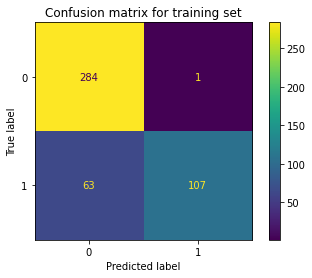

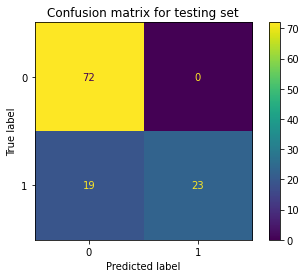

In [31]:
# Report the confusion matrix for training and testing in one of the runs
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_train, y_train_pred)
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cm_display.plot(ax=ax)
ax.set_title('Confusion matrix for training set')
plt.show()

fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cm_display.plot(ax=ax)
ax.set_title('Confusion matrix for testing set')
plt.show()

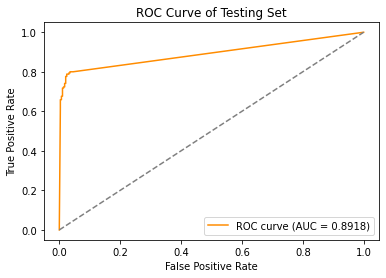

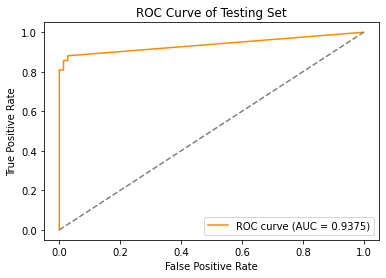

In [58]:
# Plot the ROC curve for training set in one of the runs
# use the distances from cluster center and pass them through a softmax to calculate probabilities

def softmax(x):
    x = x - np.max(x)
    exp_x = np.exp(x)
    sum_exp_x = np.sum(exp_x, axis=0, keepdims=True)
    probs = exp_x / sum_exp_x
    probs[np.isnan(probs)] = 1e-10 # deal with nan (divide by 0)
    return probs

# Compute the distances of each sample to each cluster center
distances_train = kmeans.transform(X_train)
distances_test = kmeans.transform(X_test)

# Apply softmax to each row of the distance matrix
y_train_prob = np.apply_along_axis(lambda x: softmax(x), axis=1, arr=distances_train)
y_test_prob = np.apply_along_axis(lambda x: softmax(x), axis=1, arr=distances_test)

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:, 0])
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Testing Set')
plt.legend(loc="lower right")
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob[:, 0])
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Testing Set')
plt.legend(loc="lower right")
plt.show()

#### (iv) Spectral Clustering

First, we find a proper gamma that gives similar class balance.

In [35]:
from sklearn.cluster import SpectralClustering
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = split_dataset(df, normalize=True)
print("Number of data points in clusters: ({0},{1})".format(len(y_train[y_train == 0]),len(y_train[y_train == 1])))

gamma_range = np.arange(10,30,2)

for gamma in gamma_range:
    print("For gamma = {}:".format(gamma))
    for i in range(1):
        try:
            X_train, X_test, y_train, y_test = split_dataset(df, normalize=True)
            # create Spectral Clustering object with RBF kernel and gamma value
            spectral = SpectralClustering(n_clusters=2, affinity='rbf', gamma=gamma, assign_labels='discretize')
            y_train_pred = spectral.fit_predict(X_train)
            print("Attempt {0} - Number of data points in clusters: ({1},{2})".format(i+1, len(y_train_pred[y_train_pred == 0]),
                                                                                    len(y_train_pred[y_train_pred == 1])))
        except:
            continue

Number of data points in clusters: (285,170)
For gamma = 10:
Attempt 1 - Number of data points in clusters: (408,47)
For gamma = 12:
Attempt 1 - Number of data points in clusters: (63,392)
For gamma = 14:
Attempt 1 - Number of data points in clusters: (354,101)
For gamma = 16:
Attempt 1 - Number of data points in clusters: (346,109)
For gamma = 18:
Attempt 1 - Number of data points in clusters: (139,316)
For gamma = 20:
Attempt 1 - Number of data points in clusters: (141,314)
For gamma = 22:
Attempt 1 - Number of data points in clusters: (151,304)
For gamma = 24:
Attempt 1 - Number of data points in clusters: (256,199)
For gamma = 26:
Attempt 1 - Number of data points in clusters: (242,213)
For gamma = 28:
Attempt 1 - Number of data points in clusters: (225,230)


Thus, we can conclude that when gamma is around 18-24, we can get a most similar class balance to the original dataset.

In [104]:
from sklearn.neighbors import KNeighborsClassifier

train_acc = []
train_prec = []
train_rec = []
train_f1 = []
train_auc = []

test_acc = []
test_prec = []
test_rec = []
test_f1 = []
test_auc = []

for i in range(30):
    print('Attempt:', i+1)

    try:
        X_train, X_test, y_train, y_test = split_dataset(df, normalize=True)

        spectral = SpectralClustering(n_clusters=2, affinity='rbf', gamma=20, assign_labels='discretize')
        cluster_label = spectral.fit_predict(X_train)

        # get the centers of two clusters
        cluster_centers = []
        for clus in [0,1]:
            cluster_centers.append(np.mean(X_train[cluster_label==clus], axis = 0).tolist())

        # Compute distances to cluster center and keep original indices
        distances_0 = [np.linalg.norm(arr - cluster_centers[0]) for arr in X_train]
        distances_1 = [np.linalg.norm(arr - cluster_centers[1]) for arr in X_train]

        # Sort distances by ascending order
        sorted_distances_0 = np.argsort(distances_0)
        sorted_distances_1 = np.argsort(distances_1)

        # Get indices of the closest 30 data points to the center
        closest_indices_0 = sorted_distances_0[:30].astype(int)
        closest_indices_1 = sorted_distances_1[:30].astype(int)

        # Get the true labels of those 30 points from y_train
        y_train = y_train.reset_index(drop=True)
        labels_0 = y_train[closest_indices_0]
        labels_1 = y_train[closest_indices_1]

        # Take a majority poll within each cluster
        pred_label_0 = np.bincount(labels_0).argmax()
        pred_label_1 = np.bincount(labels_1).argmax()

        # Assign predicted label to all data points
        y_train_pred = np.zeros(len(X_train))
        y_train_pred[cluster_label == 0] = pred_label_0
        y_train_pred[cluster_label == 1] = pred_label_1

        # build a KNN classifier
        knn = KNeighborsClassifier(n_neighbors=1)
        knn.fit(X_train, y_train_pred)
        y_test_pred = knn.predict(X_test)
        
        # Compute evaluation metrics for training set
        train_acc.append(metrics.accuracy_score(y_train, y_train_pred))
        train_prec.append(metrics.precision_score(y_train, y_train_pred))
        train_rec.append(metrics.recall_score(y_train, y_train_pred))
        train_f1.append(metrics.f1_score(y_train, y_train_pred))
        train_auc.append(metrics.roc_auc_score(y_train, y_train_pred))

        # Compute evaluation metrics for test set
        test_acc.append(metrics.accuracy_score(y_test, y_test_pred))
        test_prec.append(metrics.precision_score(y_test, y_test_pred))
        test_rec.append(metrics.recall_score(y_test, y_test_pred))
        test_f1.append(metrics.f1_score(y_test, y_test_pred))
        test_auc.append(metrics.roc_auc_score(y_test, y_test_pred))

        print("Train accuracy:", metrics.accuracy_score(y_train, y_train_pred), 
              "Test accuracy:", metrics.accuracy_score(y_test, y_test_pred))
    
    except:
        continue

Attempt: 1
Train accuracy: 0.654945054945055 Test accuracy: 0.7192982456140351
Attempt: 2
Train accuracy: 0.6263736263736264 Test accuracy: 0.631578947368421
Attempt: 3
Train accuracy: 0.6681318681318681 Test accuracy: 0.6403508771929824
Attempt: 4
Train accuracy: 0.6417582417582418 Test accuracy: 0.7368421052631579
Attempt: 5
Train accuracy: 0.6263736263736264 Test accuracy: 0.631578947368421
Attempt: 6
Train accuracy: 0.6703296703296703 Test accuracy: 0.7280701754385965
Attempt: 7
Train accuracy: 0.6263736263736264 Test accuracy: 0.631578947368421
Attempt: 8
Train accuracy: 0.6527472527472528 Test accuracy: 0.6666666666666666
Attempt: 9
Train accuracy: 0.6263736263736264 Test accuracy: 0.631578947368421
Attempt: 10
Train accuracy: 0.6637362637362637 Test accuracy: 0.6929824561403509
Attempt: 11
Train accuracy: 0.6505494505494506 Test accuracy: 0.6578947368421053
Attempt: 12
Train accuracy: 0.6263736263736264 Test accuracy: 0.631578947368421
Attempt: 13
Train accuracy: 0.6263736263736

In [105]:
# Print average evaluation metrics for both sets
print("Training set average evaluation metrics:")
print("Accuracy: {:.5f}".format(np.mean(train_acc)))
print("Precision: {:.5f}".format(np.mean(train_prec)))
print("Recall: {:.5f}".format(np.mean(train_rec)))
print("F1-score: {:.5f}".format(np.mean(train_f1)))
print("AUC: {:.5f}".format(np.mean(train_auc)))

print("\nTest set average evaluation metrics:")
print("Accuracy: {:.5f}".format(np.mean(test_acc)))
print("Precision: {:.5f}".format(np.mean(test_prec)))
print("Recall: {:.5f}".format(np.mean(test_rec)))
print("F1-score: {:.5f}".format(np.mean(test_f1)))
print("AUC: {:.5f}".format(np.mean(test_auc)))

Training set average evaluation metrics:
Accuracy: 0.63875
Precision: 0.28488
Recall: 0.26020
F1-score: 0.27140
AUC: 0.56238

Test set average evaluation metrics:
Accuracy: 0.66257
Precision: 0.31946
Recall: 0.27381
F1-score: 0.29216
AUC: 0.58158


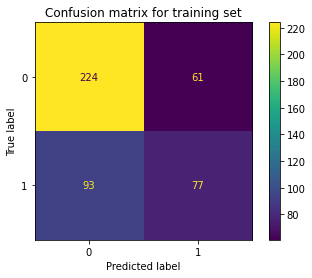

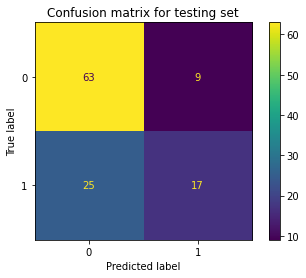

In [9]:
# Report the confusion matrix for training and testing in one of the runs
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_train, y_train_pred)
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cm_display.plot(ax=ax)
ax.set_title('Confusion matrix for training set')
plt.show()

fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cm_display.plot(ax=ax)
ax.set_title('Confusion matrix for testing set')
plt.show()

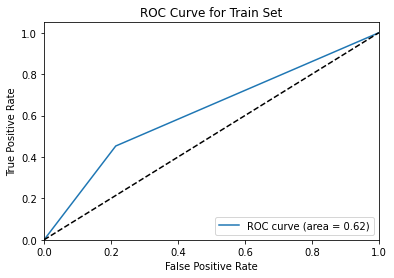

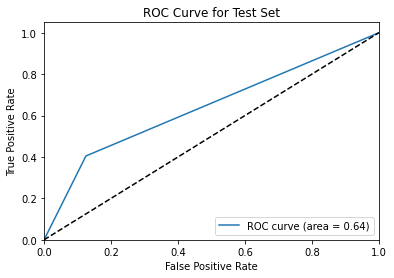

In [12]:
# Plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Train Set')
plt.legend(loc="lower right")
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Set')
plt.legend(loc="lower right")
plt.show()

#### (iv) Compare

Supervised learning with the full data set can give us the best performance, as it has access to all the labeled data and can learn from it.

In this case, semi-supervised learning performs nearly as well as supervised learning, although it tends to propagate the errors of the initial labeling and the model may become overconfident on incorrect predictions. 

Unsupervised learning is not expected to perform as well as supervised or semi-supervised learning in this scenario, as it does not have access to any labeled data and must rely solely on the structure of the data to identify clusters and make predictions.

In this senario, spectral clustering with RBF kernel performs worse than k-means. This could be due to the sensitivity of spectral clustering to the choice of parameters such as gamma and the similarity matrix.

## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set

In [3]:
# download data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
df = pd.read_csv(url, header=None)
df.columns = ["variance", "skewness", "curtosis", "entropy", "class"]

In [4]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [5]:
# Split the data into features and target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=472)

### (b) Repeat each of the following two procedures 50 times

#### (i) Passive

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

test_errors_passive = []

for j in range(50):
    X_train_pool = pd.DataFrame()
    y_train_pool = pd.DataFrame()
    X_train_remaining = X_train
    y_train_remaining = y_train

    test_errors = np.zeros(90)
    
    for i in range(90):
        # a pool of 10 randomly selected data points from training set
        X_train_pool = pd.concat([X_train_pool, X_train_remaining.iloc[:10,:]])
        X_train_remaining = X_train_remaining.iloc[10:,:]
        y_train_pool = pd.concat([y_train_pool, y_train_remaining.iloc[:10]])
        y_train_remaining = y_train_remaining.iloc[10:]

        # Define the SVM model and parameter grid for cross-validation
        svm = LinearSVC(penalty='l1', dual=False, max_iter=50000)
        param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

        # Perform 5-fold cross-validation to select the penalty parameter
        svm_cv = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
        svm_cv.fit(X_train_pool, y_train_pool.to_numpy().ravel())

        # Train an SVM on the entire training set with the selected penalty parameter
        svm_final = LinearSVC(penalty='l1', dual=False, C=svm_cv.best_params_['C'], max_iter=10000)
        svm_final.fit(X_train_pool, y_train_pool.to_numpy().ravel())

        # Save the test errors of 90 SVMs
        test_error = 1 - svm_final.score(X_test, y_test)
        test_errors[i] = test_error

    # Save the test errors of 50 Monte Carlo simulations
    test_errors_passive.append(test_errors)
    print("Attempt {}".format(j+1))

Attempt 1
Attempt 2
Attempt 3
Attempt 4
Attempt 5
Attempt 6
Attempt 7
Attempt 8
Attempt 9
Attempt 10
Attempt 11
Attempt 12
Attempt 13
Attempt 14
Attempt 15
Attempt 16
Attempt 17
Attempt 18
Attempt 19
Attempt 20
Attempt 21
Attempt 22
Attempt 23
Attempt 24
Attempt 25
Attempt 26
Attempt 27
Attempt 28
Attempt 29
Attempt 30
Attempt 31
Attempt 32
Attempt 33
Attempt 34
Attempt 35
Attempt 36
Attempt 37
Attempt 38
Attempt 39
Attempt 40
Attempt 41
Attempt 42
Attempt 43
Attempt 44
Attempt 45
Attempt 46
Attempt 47
Attempt 48
Attempt 49
Attempt 50


#### (ii) Active

In [52]:
import warnings
warnings.filterwarnings("ignore")

test_errors_active = []

for j in range(50):
    X_train_pool = pd.DataFrame()
    y_train_pool = pd.DataFrame()
    X_train_remaining = X_train
    y_train_remaining = y_train

    test_errors = np.zeros(90)
    
    # select the first ten points randomly and train SVM
    X_train_pool = pd.concat([X_train_pool, X_train_remaining.iloc[:10,:]])
    X_train_remaining = X_train_remaining.iloc[10:,:]
    y_train_pool = pd.concat([y_train_pool, y_train_remaining.iloc[:10]])
    y_train_remaining = y_train_remaining.iloc[10:]
    
    svm = LinearSVC(penalty='l1', dual=False, max_iter=50000)
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
    svm_cv = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
    svm_cv.fit(X_train_pool, y_train_pool.to_numpy().ravel())
    svm_final = LinearSVC(penalty='l1', dual=False, C=svm_cv.best_params_['C'], max_iter=50000)
    svm_final.fit(X_train_pool, y_train_pool.to_numpy().ravel())
    
    test_error = 1 - svm_final.score(X_test, y_test)
    test_errors[0] = test_error
    
    for i in range(1,90):
        # If all selected data points are from one class, select another set of 10 data points randomly
        if np.unique(y_train_pool).size == 1:
            X_train_pool = pd.concat([X_train_pool, X_train_remaining.iloc[:10,:]])
            X_train_remaining = X_train_remaining.iloc[10:,:]
            y_train_pool = pd.concat([y_train_pool, y_train_remaining.iloc[:10]])
            y_train_remaining = y_train_remaining.iloc[10:]
        
        else:
            # Choose the 10 closest data points in the training set to the hyperplane of the SVM and add them to the pool
            distances = svm_final.decision_function(X_train_remaining)
            distances_sorted = np.argsort(np.abs(distances))
            closest_indices = distances_sorted[:10]
            
            X_train_remaining = X_train_remaining.reset_index(drop=True)
            y_train_remaining = y_train_remaining.reset_index(drop=True)
            X_train_pool = pd.concat([X_train_pool, X_train_remaining.iloc[closest_indices]])
            X_train_remaining = X_train_remaining.drop(closest_indices, axis=0)
            y_train_pool = pd.concat([y_train_pool, y_train_remaining.iloc[closest_indices]])
            y_train_remaining = y_train_remaining.drop(closest_indices, axis=0)

        # Define the SVM model and parameter grid for cross-validation
        svm = LinearSVC(penalty='l1', dual=False, max_iter=50000)
        param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

        # Perform 5-fold cross-validation to select the penalty parameter
        svm_cv = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
        svm_cv.fit(X_train_pool, y_train_pool.to_numpy().ravel())

        # Train an SVM on the entire training set with the selected penalty parameter
        svm_final = LinearSVC(penalty='l1', dual=False, C=svm_cv.best_params_['C'], max_iter=50000)
        svm_final.fit(X_train_pool, y_train_pool.to_numpy().ravel())

        # Save the test errors of 90 SVMs
        test_error = 1 - svm_final.score(X_test, y_test)
        test_errors[i] = test_error
        
        # print("Attempt {}".format(i+1))
        # print("Test error:", test_error)

    # Save the test errors of 50 Monte Carlo simulations
    test_errors_active.append(test_errors)
    print("Attempt {}".format(j+1))

Attempt 1
Attempt 2
Attempt 3
Attempt 4
Attempt 5
Attempt 6
Attempt 7
Attempt 8
Attempt 9
Attempt 10
Attempt 11
Attempt 12
Attempt 13
Attempt 14
Attempt 15
Attempt 16
Attempt 17
Attempt 18
Attempt 19
Attempt 20
Attempt 21
Attempt 22
Attempt 23
Attempt 24
Attempt 25
Attempt 26
Attempt 27
Attempt 28
Attempt 29
Attempt 30
Attempt 31
Attempt 32
Attempt 33
Attempt 34
Attempt 35
Attempt 36
Attempt 37
Attempt 38
Attempt 39
Attempt 40
Attempt 41
Attempt 42
Attempt 43
Attempt 44
Attempt 45
Attempt 46
Attempt 47
Attempt 48
Attempt 49
Attempt 50


### (c) Average the 50 test errors

In [59]:
passive_averages = [sum(sublst)/len(sublst) for sublst in zip(*test_errors_passive)]

In [61]:
active_averages = [sum(sublst)/len(sublst) for sublst in zip(*test_errors_active)]

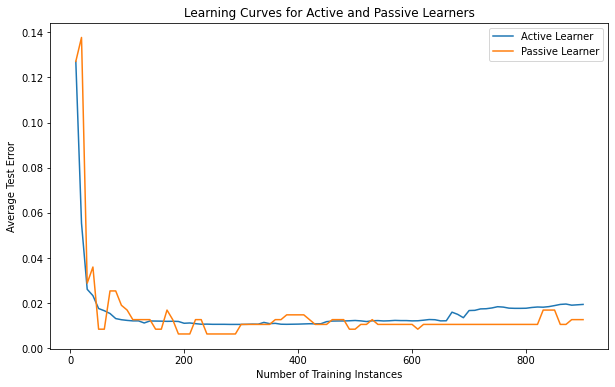

In [66]:
training_instances = list(range(10, 910, 10))
plt.figure(figsize=(10, 6)) 
plt.plot(training_instances, active_averages, label='Active Learner')
plt.plot(training_instances, passive_averages, label='Passive Learner')
plt.xlabel('Number of Training Instances')
plt.ylabel('Average Test Error')
plt.title('Learning Curves for Active and Passive Learners')
plt.legend()
plt.show()

Here, active learning is more stable and decreases faster than passive learning because active learning chooses the most informative instances to add to the training set, whereas passive learning randomly selects instances. Active learning can also achieve higher accuracy with a smaller training set and can reduce the labeling cost associated with labeling uninformative instances.

However, active learning test error may start to increase in the end if the algorithm has exhausted the most informative samples and is forced to sample from less informative ones. In other words, the pool of remaining unlabeled samples may have become less diverse and informative as the algorithm progresses, leading to a decrease in performance.